# Loss Functions

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import mxnet as mx
from mxnet import nd, autograd
import numpy as np
import math

x = nd.arange(-5, 5, 0.01)
x.attach_grad()

## $l_2$ loss

$$
\begin{align}
l(y,y') = \frac{1}{2}(y-y')^2
\end{align}
$$

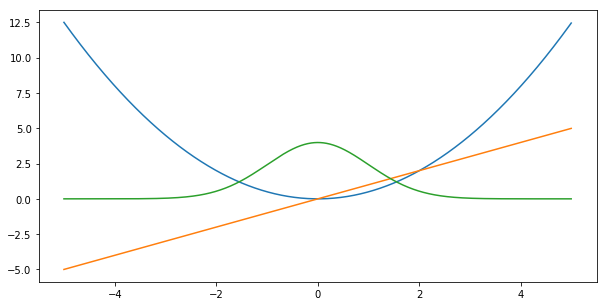

In [11]:
with autograd.record():
    l = 0.5 * x**2
l.backward()
p = nd.exp(-l)
p = 100 * p / p.sum()
plt.figure(figsize=(10, 5))
plt.plot(x.asnumpy(), l.asnumpy())
plt.plot(x.asnumpy(), x.grad.asnumpy())
plt.plot(x.asnumpy(), 10*p.asnumpy())
plt.show()

## $l_1$ loss

$$
\begin{align}
l(y,y') = |y-y'|
\end{align}
$$

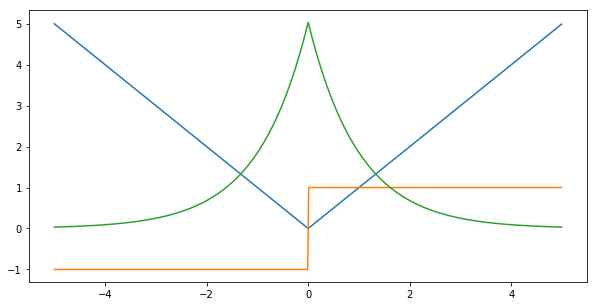

In [12]:
with autograd.record():
    l = nd.abs(x)
l.backward()
p = nd.exp(-l)
p = 100 * p / p.sum()
plt.figure(figsize=(10, 5))
plt.plot(x.asnumpy(), l.asnumpy())
plt.plot(x.asnumpy(), x.grad.asnumpy())
plt.plot(x.asnumpy(), 10*p.asnumpy())
plt.show()

## Huber's Robust loss

$$
\begin{align}
l(y,y') = \begin{cases}
|y-y'| - \frac{1}{2} & \text{ if } |y-y'| > 1 \\
\frac{1}{2} (y-y')^2 & \text{ otherwise}
\end{cases}
\end{align}
$$

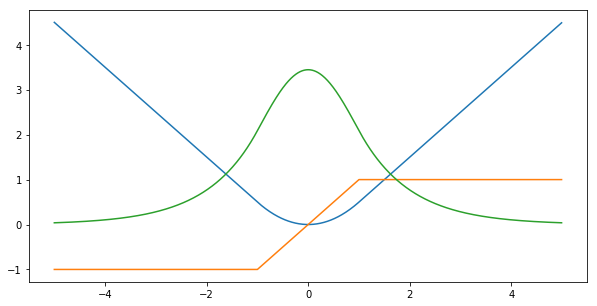

In [13]:
with autograd.record():
    tmp = nd.abs(x) > 1
    l = tmp * (nd.abs(x) - 0.5) + (1-tmp) * (0.5 * x**2)
l.backward()
p = nd.exp(-l)
p = 100 * p / p.sum()
plt.figure(figsize=(10, 5))
plt.plot(x.asnumpy(), l.asnumpy())
plt.plot(x.asnumpy(), x.grad.asnumpy())
plt.plot(x.asnumpy(), 10*p.asnumpy())
plt.show()

Many more loss functions, e.g.
* $\epsilon$-insensitive loss $\mathrm{max}(0, |y-y'| - \epsilon)$
* Huber's robust loss with width adjustment
* Log-normal loss, i.e. $(\log y - \log y')^2$